# Tutorial 5. Classifying wine by quality

Created by Emanuel Flores-Bautista 2018.  All code contained in this notebook is licensed under the [Creative Commons License 4.0](https://creativecommons.org/licenses/by/4.0/).

This tutorial was based on a blog post, you can find it [here](https://towardsdatascience.com/building-a-deployable-ml-classifier-in-python-46ba55e1d720).

"Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests. " Data set available [here](https://archive.ics.uci.edu/ml/datasets/wine+quality). 

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cd Downloads

/Users/manoloflores/Downloads


Make it reproducible.

In [7]:
np.random.seed(42)

In [8]:
df = pd.read_csv('winequality-red.csv', delimiter= ';')
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [9]:
df.shape

(1599, 12)

Let's get a sense of the dataset.

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Let's see the distribution of the wines' quality.

In [11]:
from collections import Counter
Counter(df["quality"])

Counter({3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18})

### Checking the wine quality distribution                         

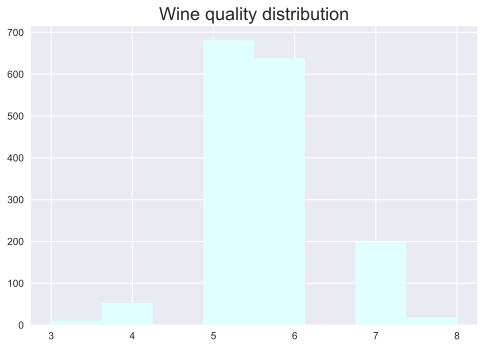

In [15]:
plt.hist(df["quality"], bins= 8, color= 'lightcyan')
plt.title('Wine quality distribution', fontsize= 18)

We can see that our dataset, is approximately normally distributed...

> ### "To make it a binary classification problem, let’s take quality > 5 is good otherwise bad."

> ##### 1 means good quality and 0 means bad quality

In [14]:
df["quality_bin"] = np.zeros(df.shape[0])
df["quality_bin"] = df["quality_bin"].where(df["quality"]< 6, 1)

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0


In [16]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,1.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,1.0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0.0


Sidenote: the `df["quality_bin"].where(df["quality"]< 6, 1)` expression seems a bit counterintuitive, but is the way Pandas was made.

"As visible from the snapshot, data values are quite deviated at some attributes. It is a good practice to standardize the values as it will bring the variance to a reasonable level. Also, since most of the algorithms are using euclidean distance in background, having scaled features is better in model building."

In [17]:
from sklearn.preprocessing import StandardScaler
X_data = df.iloc[:,:11].values
y_data = df.iloc[:,12].values
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

In [18]:
unique, counts = np.unique(y_data, return_counts=True)
dict(zip(unique, counts))

{0.0: 744, 1.0: 855}

Now, we have total 1599 data instances, out of which 855s are of good quality and 744s are of bad quality. Data is clearly imbalanced here. **Since less number of data instances are bad, we will have to go for oversampling.** But it is important to note that **resampling should always be done only on training data** not on testing/validation data. Now, let’s divide the dataset into training and testing dataset for model building.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42) 
#so that 30% will be selected for testing data randomly

In [21]:
X_train.shape, y_train.shape

((1119, 11), (1119,))

In [22]:
X_test.shape, y_test.shape

((480, 11), (480,))

In [24]:
480/(1119+480)

0.300187617260788

We can see that 30% of the dataset will be used to test the model.

In [25]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0.0: 531, 1.0: 588}

In [26]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0.0: 213, 1.0: 267}

Instead of train and test split, you can go for beleived to be more effective cross validation method also. Now we have 588 good quality and 531 bad quality instances for training. 267 good quality and 213 bad quality instances for testing remained. It’s the time to resample the training data in order to balance it so that the model won’t be *biased*. This is a normal problem in machine learning, i.e. we don't have sufficient data to train our model 50/50% in binary classification problems. 

A method called oversampling can solve this problem. There is a super powerful algorithm called **Synthetic Minority Oversampling Technique (SMOTE)** to do so. You can learn about SMOTE [here](https://youtu.be/FheTDyCwRdE).

In [27]:
from imblearn.over_sampling import SMOTE
#oversampling need to be done on training dataset only
X_train_res, y_train_res = SMOTE().fit_sample(X_train, y_train)

Test that it worked..

In [ ]:
unique, counts = np.unique(y_train_res, return_counts=True)
dict(zip(unique, counts))

After over sampling, there are 588 instances from both good and bad quality wine in training set. Now is the time for model selection. **I have taken here Stochastic Gradient Classifier.** But, you can check a few models and compare the accuracy.

In [28]:
from sklearn.linear_model import SGDClassifier
sg = SGDClassifier(random_state=42)
sg.fit(X_train_res,y_train_res)
pred = sg.predict(X_test)
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.60      0.80      0.68       213
        1.0       0.78      0.57      0.66       267

avg / total       0.70      0.67      0.67       480

0.672916666667


/Users/manoloflores/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


The accuracy got is 67.3%. **We can effectively select the best parameters for the model using GridSearchCV.** This type of algorithms are called hyperparameter optimization, but we will not delve into that matter in this tutorial.

If you need the classifier, it can simply be loaded using joblib and the feature array will be passed to get the result.

In [33]:
#clf1 = joblib.load("wine_quality_clf.pkl")
#clf1.predict([X_test[0]])

Let's try another classifier, called the [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron). 

In [34]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=42)

clf.fit(X_train_res, y_train_res)   

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [35]:
pred= clf.predict(X_test)

In [36]:
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.65      0.74      0.69       213
        1.0       0.77      0.69      0.72       267

avg / total       0.72      0.71      0.71       480

0.710416666667


 We can see that a neural network has a better performance! 

### Conclusion: A note on big data

From previous experience, I would argue that the model needs more data to have a better prediction accuracy. Thus, *big data* is not really a problem, but the other way around. **In machine learning, the more data you feed into the model, the better!**

Caveat: as long as it's high-quality data...